In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [2]:
train = pd.read_csv("train_data.csv")

In [3]:
test = pd.read_csv("test_data_hidden.csv")
test.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


In [5]:
test_hidden = pd.read_csv('test_data_hidden.csv')
test_hidden.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
train['Date']= pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982644 entries, 0 to 982643
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          982644 non-null  int64         
 1   DayOfWeek      982644 non-null  int64         
 2   Date           982644 non-null  datetime64[ns]
 3   Sales          982644 non-null  int64         
 4   Customers      982644 non-null  int64         
 5   Open           982644 non-null  int64         
 6   Promo          982644 non-null  int64         
 7   StateHoliday   982644 non-null  object        
 8   SchoolHoliday  982644 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 67.5+ MB


In [8]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000
mean,558.444843,3.998282,5760.843202,632.770227,0.828585,0.380183,0.171928
std,321.909907,2.000138,3857.573443,465.401378,0.376871,0.485432,0.377318
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3705.000000,403.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5731.000000,609.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7847.000000,838.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000


In [9]:
train.shape

(982644, 9)

In [10]:
test.shape

(34565, 9)

In [11]:
for column in train:
    if column != 'Date':
        print(column,'\n','Unique values: ', train[column].unique(),'\n', 
              'number of unique values', train[column].nunique(), '\n', '-'*100)

Store 
 Unique values:  [   1    2    3 ... 1113 1114 1115] 
 number of unique values 1115 
 ----------------------------------------------------------------------------------------------------
DayOfWeek 
 Unique values:  [2 1 7 6 5 4 3] 
 number of unique values 7 
 ----------------------------------------------------------------------------------------------------
Sales 
 Unique values:  [ 5735  9863 13261 ... 17815 23303 20355] 
 number of unique values 21642 
 ----------------------------------------------------------------------------------------------------
Customers 
 Unique values:  [ 568  877 1072 ...   36 3299 4065] 
 number of unique values 4076 
 ----------------------------------------------------------------------------------------------------
Open 
 Unique values:  [1 0] 
 number of unique values 2 
 ----------------------------------------------------------------------------------------------------
Promo 
 Unique values:  [1 0] 
 number of unique values 2 
 ------------

In [12]:
concat = pd.concat([train, test],ignore_index=True )

In [13]:
concat.shape

(1017209, 9)

In [14]:
concat.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


In [15]:
concat["StateHoliday"] = concat["StateHoliday"].replace({"0":0, "a":1, "b":2, "c":3})

concat["Day"]= pd.to_datetime(concat["Date"]).dt.day
concat["Month"]= pd.to_datetime(concat["Date"]).dt.month
concat["Year"]= pd.to_datetime(concat["Date"]).dt.year

concat.drop(['Date', 'Customers'], axis=1, inplace=True)

In [16]:
concat.head()

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year
0,1,2,5735,1,1,0,0,30,6,2015
1,2,2,9863,1,1,0,0,30,6,2015
2,3,2,13261,1,1,0,1,30,6,2015
3,4,2,13106,1,1,0,0,30,6,2015
4,5,2,6635,1,1,0,0,30,6,2015


In [17]:
train = concat[:982644]
test = concat[982644:].reset_index(drop=True)

In [18]:
train

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year
0,1,2,5735,1,1,0,0,30,6,2015
1,2,2,9863,1,1,0,0,30,6,2015
2,3,2,13261,1,1,0,1,30,6,2015
3,4,2,13106,1,1,0,0,30,6,2015
4,5,2,6635,1,1,0,0,30,6,2015
...,...,...,...,...,...,...,...,...,...,...
982639,1111,2,0,0,0,1,1,1,1,2013
982640,1112,2,0,0,0,1,1,1,1,2013
982641,1113,2,0,0,0,1,1,1,1,2013
982642,1114,2,0,0,0,1,1,1,1,2013


In [19]:
test

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year
0,1,5,5263,1,1,0,1,31,7,2015
1,2,5,6064,1,1,0,1,31,7,2015
2,3,5,8314,1,1,0,1,31,7,2015
3,4,5,13995,1,1,0,1,31,7,2015
4,5,5,4822,1,1,0,1,31,7,2015
...,...,...,...,...,...,...,...,...,...,...
34560,1111,3,3701,1,1,0,1,1,7,2015
34561,1112,3,10620,1,1,0,1,1,7,2015
34562,1113,3,8222,1,1,0,0,1,7,2015
34563,1114,3,27071,1,1,0,0,1,7,2015


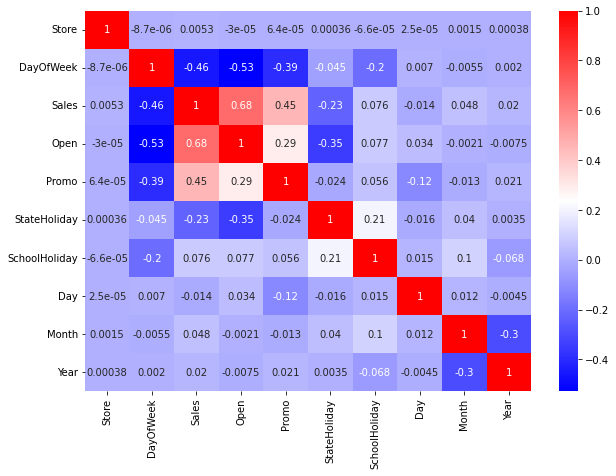

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(train.corr(), annot=True, cmap='bwr')
plt.show()

In [21]:
train.shape

(982644, 10)

In [22]:
test.shape

(34565, 10)

In [23]:
X_train = train.drop('Sales', axis=1)
y_train = train['Sales']

X_test = test.drop('Sales', axis=1)
y_test = test['Sales']

In [24]:
X_test.head()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year
0,1,5,1,1,0,1,31,7,2015
1,2,5,1,1,0,1,31,7,2015
2,3,5,1,1,0,1,31,7,2015
3,4,5,1,1,0,1,31,7,2015
4,5,5,1,1,0,1,31,7,2015


In [25]:
y_test.head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

## Linear Regression Model

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)

train_pred = lr.predict(X_train)
print('R-squared error for training set is: ', r2_score(train_pred, y_train))
print('RMSE for training set is: ', mean_squared_error( train_pred, y_train, squared=False))
print('MAE for training set is: ',mean_absolute_error(train_pred, y_train))

test_pred = lr.predict(X_test)
print('R-squared error for testing set is: ', r2_score(test_pred, y_test))
print('RMSE for testing set is: ', mean_squared_error( test_pred, y_test, squared=False))
print('MAE for testing set is: ',mean_absolute_error(test_pred, y_test))


# R-squared error for testing set is:  0.14708710706523198
# RMSE for testing set is:  2519.953267141104
# MAE for testing set is:  1731.4698261558028

R-squared error for training set is:  0.14232980379971882
RMSE for training set is:  2621.137687212003
MAE for training set is:  1776.865895995101
R-squared error for testing set is:  0.02689842490293093
RMSE for testing set is:  2549.4005017873146
MAE for testing set is:  1804.1885461004288


## Regularization

In [27]:
ridge = Ridge()

ridge.fit(X_train, y_train)

train_pred = ridge.predict(X_train)
print('R-squared error for training set is: ', r2_score(train_pred, y_train))
print('RMSE for training set is: ', mean_squared_error( train_pred, y_train, squared=False))
print('MAE for training set is: ',mean_absolute_error(train_pred, y_train))

test_pred = ridge.predict(X_test)
print('R-squared error for testing set is: ', r2_score(test_pred, y_test))
print('RMSE for testing set is: ', mean_squared_error( test_pred, y_test, squared=False))
print('MAE for testing set is: ',mean_absolute_error(test_pred, y_test))


R-squared error for training set is:  0.14232181700773672
RMSE for training set is:  2621.137687282552
MAE for training set is:  1776.864016580981
R-squared error for testing set is:  0.026889704369615353
RMSE for testing set is:  2549.3996635992853
MAE for testing set is:  1804.1909321162188


## Applying Tree Based Regressor

### Descision Tree Regressor

In [28]:
dt_reg = DecisionTreeRegressor(max_depth=10,max_features=3000)

dt_reg.fit(X_train, y_train)
train_pred = dt_reg.predict(X_train)
print('R-squared error for training set is: ', r2_score(train_pred, y_train))
print('RMSE for training set is: ', mean_squared_error(train_pred, y_train, squared=False))
print('MAE for training set is: ',mean_absolute_error(train_pred, y_train))

test_pred = dt_reg.predict(X_test)
print('R-squared error for testing set is: ', r2_score(test_pred, y_test))
print('RMSE for testing set is: ', mean_squared_error( test_pred, y_test, squared=False))
print('MAE for testing set is: ',mean_absolute_error(test_pred, y_test))


R-squared error for training set is:  0.3503383972300681
RMSE for training set is:  2420.8069017508697
MAE for training set is:  1599.3017455317668
R-squared error for testing set is:  0.19157066953346258
RMSE for testing set is:  2558.5621171228236
MAE for testing set is:  1780.917715527327


### Random Forest

In [29]:
rf_reg = RandomForestRegressor(n_estimators=100,
                               max_features=1000,
                               max_depth=10
                              )

rf_reg.fit(X_train, y_train)
test_pred = rf_reg.predict(X_test)

train_pred = rf_reg.predict(X_train)
print('R-squared error for training set is: ', r2_score(train_pred, y_train))
print('RMSE for training set is: ', mean_squared_error( train_pred, y_train, squared=False))
print('MAE for training set is: ',mean_absolute_error(train_pred, y_train),'\n'*2)

print('R-squared error for testing set is: ', r2_score(test_pred, y_test))
print('RMSE for testing set is: ', mean_squared_error( test_pred, y_test, squared=False))
print('MAE for testing set is: ',mean_absolute_error(test_pred, y_test))

R-squared error for training set is:  0.35530070352060983
RMSE for training set is:  2406.049254654109
MAE for training set is:  1591.9613817117165 


R-squared error for testing set is:  0.20599239822406235
RMSE for testing set is:  2551.6677652075596
MAE for testing set is:  1776.2206275785954


In [30]:
# from sklearn.model_selection import RandomizedSearchCV

# n_estimators = [10, 20, 30, 50, 100]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

In [31]:
# rf = RandomForestRegressor()
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
#                                cv = 3, verbose=2, random_state=42, n_jobs = -1)
# rf_random

In [32]:
# rf_random.best_estimator_
# rf_random.best_params_

In [33]:
# rf_random.fit(X_train, y_train)
# test_preds = rf_random.predict(X_test)

# print('R-squared error for testing set is: ', r2_score(test_pred, y_test))
# print('RMSE for testing set is: ', mean_squared_error( test_pred, y_test, squared=False))
# print('MAE for testing set is: ',mean_absolute_error(test_pred, y_test))

### ADA Boost

In [34]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
test_pred = ada.predict(X_test)
print('R-squared error for testing set is: ', r2_score(test_pred, y_test))
print('RMSE for testing set is: ', mean_squared_error( test_pred, y_test, squared=False))
print('MAE for testing set is: ',mean_absolute_error(test_pred, y_test))


R-squared error for testing set is:  -0.24434769420598457
RMSE for testing set is:  3787.2128383080562
MAE for testing set is:  3074.700502577465


### Gradient Boosting

In [35]:
gbr = GradientBoostingRegressor(max_depth=10,max_features=3000)
gbr.fit(X_train, y_train)

test_pred = gbr.predict(X_test)
print('R-squared error for testing set is: ', r2_score(test_pred, y_test))
print('RMSE for testing set is: ', mean_squared_error( test_pred, y_test, squared=False))
print('MAE for testing set is: ',mean_absolute_error(test_pred, y_test))


R-squared error for testing set is:  0.7114974116733714
RMSE for testing set is:  1603.3430073119118
MAE for testing set is:  1143.9630196814726


# Deep Learning - ANN

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout 

# ANN Model 1

In [38]:
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam',loss=tf.keras.losses.mean_squared_error, )
model.fit(X_train, y_train, batch_size=64 , epochs=10)

Epoch 1/10
15354/15354 [==============================] - 30s 2ms/step - loss: 9273100.0000
Epoch 2/10
15354/15354 [==============================] - 30s 2ms/step - loss: 7565577.5000
Epoch 3/10
15354/15354 [==============================] - 30s 2ms/step - loss: 7582293.0000
Epoch 4/10
15354/15354 [==============================] - 30s 2ms/step - loss: 7546819.5000
Epoch 5/10
15354/15354 [==============================] - 30s 2ms/step - loss: 7506089.0000
Epoch 6/10
15354/15354 [==============================] - 29s 2ms/step - loss: 7512459.0000
Epoch 7/10
15354/15354 [==============================] - 29s 2ms/step - loss: 7499404.0000
Epoch 8/10
15354/15354 [==============================] - 29s 2ms/step - loss: 7520709.0000
Epoch 9/10
15354/15354 [==============================] - 29s 2ms/step - loss: 7523685.5000
Epoch 10/10
15354/15354 [==============================] - 28s 2ms/step - loss: 7517074.0000


In [39]:
preds = model.predict(X_test)
print('MSE: ', mean_squared_error(preds, y_test, squared=False))
print('MAE: ', mean_absolute_error(preds, y_test))

1081/1081 [==============================] - 1s 1ms/step
MSE:  2572.7268818392636
MAE:  1825.574748805082


# ANN model 2

In [40]:
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam',loss=tf.keras.losses.mean_squared_error, )
model.fit(X_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
15354/15354 [==============================] - 28s 2ms/step - loss: 9525212.0000
Epoch 2/10
15354/15354 [==============================] - 28s 2ms/step - loss: 8147606.0000
Epoch 3/10
15354/15354 [==============================] - 28s 2ms/step - loss: 8081117.5000
Epoch 4/10
15354/15354 [==============================] - 28s 2ms/step - loss: 8014741.0000
Epoch 5/10
15354/15354 [==============================] - 28s 2ms/step - loss: 7973970.0000
Epoch 6/10
15354/15354 [==============================] - 28s 2ms/step - loss: 7919877.0000
Epoch 7/10
15354/15354 [==============================] - 28s 2ms/step - loss: 7849680.5000
Epoch 8/10
15354/15354 [==============================] - 28s 2ms/step - loss: 7759150.0000
Epoch 9/10
15354/15354 [==============================] - 29s 2ms/step - loss: 7703314.0000
Epoch 10/10
15354/15354 [==============================] - 29s 2ms/step - loss: 7662173.0000


In [41]:
preds = model.predict(X_test)
print('MSE: ', mean_squared_error(preds, y_test, squared=False))
print('MAE: ', mean_absolute_error(preds, y_test))

1081/1081 [==============================] - 1s 941us/step
MSE:  2540.786177958037
MAE:  1665.9346506545603


# ANN model 3

In [42]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
#model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear') )

model.compile(optimizer='adam',loss=tf.keras.losses.mean_squared_error, )
model.fit(X_train, y_train, batch_size=100, epochs=10,shuffle=False,verbose=1)

Epoch 1/10
9827/9827 [==============================] - 17s 2ms/step - loss: 16415721.0000
Epoch 2/10
9827/9827 [==============================] - 18s 2ms/step - loss: 15131015.0000
Epoch 3/10
9827/9827 [==============================] - 17s 2ms/step - loss: 12401172.0000
Epoch 4/10
9827/9827 [==============================] - 17s 2ms/step - loss: 9739641.0000
Epoch 5/10
9827/9827 [==============================] - 18s 2ms/step - loss: 9003329.0000
Epoch 6/10
9827/9827 [==============================] - 17s 2ms/step - loss: 8664066.0000
Epoch 7/10
9827/9827 [==============================] - 17s 2ms/step - loss: 8361703.5000
Epoch 8/10
9827/9827 [==============================] - 16s 2ms/step - loss: 8221176.5000
Epoch 9/10
9827/9827 [==============================] - 16s 2ms/step - loss: 8046758.5000
Epoch 10/10
9827/9827 [==============================] - 16s 2ms/step - loss: 7833412.5000


In [43]:
preds = model.predict(X_test)
print('MSE',np.sqrt(mean_squared_error(preds,y_test)))
print('MAE',mean_absolute_error(preds,y_test))

1081/1081 [==============================] - 1s 946us/step
MSE 3144.2763155864377
MAE 2097.514723339106
